# TASK 2 : DATA INSIGHTS

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('data.xlsx', sheet_name="CustomerDemographic")

In [4]:
df

customer_id      first_name  last_name  gender  \
0               1         Laraine  Medendorp       F   
1               2             Eli    Bockman    Male   
2               3           Arlin     Dearle    Male   
3               4          Talbot        NaN    Male   
4               5  Sheila-kathryn     Calton  Female   
...           ...             ...        ...     ...   
3995         3996         Rosalia   Halgarth  Female   
3996         3997          Blanch     Nisuis  Female   
3997         3998          Sarene    Woolley       U   
3998         3999       Patrizius        NaN    Male   
3999         4000           Kippy    Oldland    Male   

      past_3_years_bike_related_purchases        DOB               job_title  \
0                                      93 1953-10-12     Executive Secretary   
1                                      81 1980-12-16  Administrative Officer   
2                                      61 1954-01-20      Recruiting Manager   
3                                      33 1961-10-03                     NaN   
4                                      56 1977-05-13           Senior Editor   
...                                   ...        ...                     ...   
3995                                    8 1975-08-09   VP Product Management   
3996                                   87 2001-07-13         Statistician II   
3997                                   60        NaT       Assistant Manager   
3998                                   11 1973-10-24                     NaN   
3999                                   76 1991-11-05    Software Engineer IV   

     job_industry_category     wealth_segment deceased_indicator  \
0                   Health      Mass Customer                  N   
1       Financial Services      Mass Customer                  N   
2                 Property      Mass Customer                  N   
3                       IT      Mass Customer                  N   
4                      NaN  Affluent Customer                  N   
...                    ...                ...                ...   
3995                Health      Mass Customer                  N   
3996         Manufacturing     High Net Worth                  N   
3997                    IT     High Net Worth                  N   
3998         Manufacturing  Affluent Customer                  N   
3999                   NaN  Affluent Customer                  N   

                                                default owns_car  tenure  
0                                                    "'      Yes    11.0  
1                          <script>alert('hi')</script>      Yes    16.0  
2                                   2018-02-01 00:00:00      Yes    15.0  
3     () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                   NIL      Yes     8.0  
...                                                 ...      ...     ...  
3995                                               -100       No    19.0  
3996                                           â¦testâ§      Yes     1.0  
3997                                                NaN       No     NaN  
3998                             Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0  
3999                                                0/0       No    11.0  

[4000 rows x 13 columns]

In [5]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
df.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [7]:
df['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [8]:
df = df.rename(columns={'past_3_years_bike_related_purchases':'past_purchases'})
df

customer_id      first_name  last_name  gender  past_purchases  \
0               1         Laraine  Medendorp       F              93   
1               2             Eli    Bockman    Male              81   
2               3           Arlin     Dearle    Male              61   
3               4          Talbot        NaN    Male              33   
4               5  Sheila-kathryn     Calton  Female              56   
...           ...             ...        ...     ...             ...   
3995         3996         Rosalia   Halgarth  Female               8   
3996         3997          Blanch     Nisuis  Female              87   
3997         3998          Sarene    Woolley       U              60   
3998         3999       Patrizius        NaN    Male              11   
3999         4000           Kippy    Oldland    Male              76   

            DOB               job_title job_industry_category  \
0    1953-10-12     Executive Secretary                Health   
1    1980-12-16  Administrative Officer    Financial Services   
2    1954-01-20      Recruiting Manager              Property   
3    1961-10-03                     NaN                    IT   
4    1977-05-13           Senior Editor                   NaN   
...         ...                     ...                   ...   
3995 1975-08-09   VP Product Management                Health   
3996 2001-07-13         Statistician II         Manufacturing   
3997        NaT       Assistant Manager                    IT   
3998 1973-10-24                     NaN         Manufacturing   
3999 1991-11-05    Software Engineer IV                   NaN   

         wealth_segment deceased_indicator  \
0         Mass Customer                  N   
1         Mass Customer                  N   
2         Mass Customer                  N   
3         Mass Customer                  N   
4     Affluent Customer                  N   
...                 ...                ...   
3995      Mass Customer                  N   
3996     High Net Worth                  N   
3997     High Net Worth                  N   
3998  Affluent Customer                  N   
3999  Affluent Customer                  N   

                                                default owns_car  tenure  
0                                                    "'      Yes    11.0  
1                          <script>alert('hi')</script>      Yes    16.0  
2                                   2018-02-01 00:00:00      Yes    15.0  
3     () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                   NIL      Yes     8.0  
...                                                 ...      ...     ...  
3995                                               -100       No    19.0  
3996                                           â¦testâ§      Yes     1.0  
3997                                                NaN       No     NaN  
3998                             Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0  
3999                                                0/0       No    11.0  

[4000 rows x 13 columns]

In [9]:
df.drop('default',axis=1)

customer_id      first_name  last_name  gender  past_purchases  \
0               1         Laraine  Medendorp       F              93   
1               2             Eli    Bockman    Male              81   
2               3           Arlin     Dearle    Male              61   
3               4          Talbot        NaN    Male              33   
4               5  Sheila-kathryn     Calton  Female              56   
...           ...             ...        ...     ...             ...   
3995         3996         Rosalia   Halgarth  Female               8   
3996         3997          Blanch     Nisuis  Female              87   
3997         3998          Sarene    Woolley       U              60   
3998         3999       Patrizius        NaN    Male              11   
3999         4000           Kippy    Oldland    Male              76   

            DOB               job_title job_industry_category  \
0    1953-10-12     Executive Secretary                Health   
1    1980-12-16  Administrative Officer    Financial Services   
2    1954-01-20      Recruiting Manager              Property   
3    1961-10-03                     NaN                    IT   
4    1977-05-13           Senior Editor                   NaN   
...         ...                     ...                   ...   
3995 1975-08-09   VP Product Management                Health   
3996 2001-07-13         Statistician II         Manufacturing   
3997        NaT       Assistant Manager                    IT   
3998 1973-10-24                     NaN         Manufacturing   
3999 1991-11-05    Software Engineer IV                   NaN   

         wealth_segment deceased_indicator owns_car  tenure  
0         Mass Customer                  N      Yes    11.0  
1         Mass Customer                  N      Yes    16.0  
2         Mass Customer                  N      Yes    15.0  
3         Mass Customer                  N       No     7.0  
4     Affluent Customer                  N      Yes     8.0  
...                 ...                ...      ...     ...  
3995      Mass Customer                  N       No    19.0  
3996     High Net Worth                  N      Yes     1.0  
3997     High Net Worth                  N       No     NaN  
3998  Affluent Customer                  N      Yes    10.0  
3999  Affluent Customer                  N       No    11.0  

[4000 rows x 12 columns]

[2039, 1873, 88]


([<matplotlib.axis.XTick at 0xcc97a0dcd0>,
 [Text(0, 0, 'Female'),
  Text(0, 0, "F's P"),
  Text(0, 0, 'Male'),
  Text(0, 0, "M's P"),
  Text(0, 0, 'Unknown'),
  Text(0, 0, "U's P")])

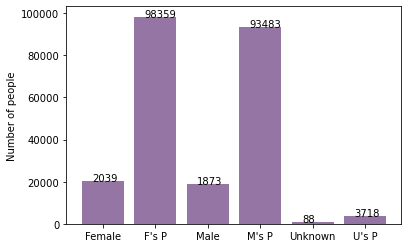

In [10]:
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df['past_purchases'][df['gender'] == 'Female'].sum() + df['past_purchases'][df['gender'] == 'F'].sum()+df['past_purchases'][df['gender']=='Femal'].sum()
bike[1] += df['past_purchases'][df['gender'] == 'Male'].sum() + df['past_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))


([<matplotlib.axis.XTick at 0xcc979757f0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unknown')])

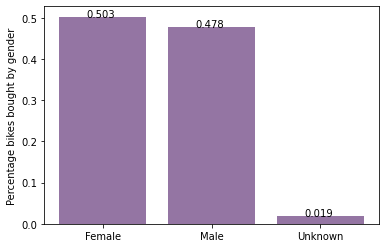

In [11]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [37]:
from datetime import date 
age = []
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 
lenn = len(df['DOB'])
for i in range(lenn):
    ag = calculateAge(df['DOB'][i])
    age.append(ag)
age1 = pd.DataFrame({'customer_id':df['customer_id'],'Age':age})
age1.head()
age1.tail()
df = pd.merge(df,age1,how='left', on='customer_id')
df

customer_id      first_name  last_name  gender  past_purchases  \
0               1         Laraine  Medendorp       F              93   
1               2             Eli    Bockman    Male              81   
2               3           Arlin     Dearle    Male              61   
3               4          Talbot        NaN    Male              33   
4               5  Sheila-kathryn     Calton  Female              56   
...           ...             ...        ...     ...             ...   
3995         3996         Rosalia   Halgarth  Female               8   
3996         3997          Blanch     Nisuis  Female              87   
3997         3998          Sarene    Woolley       U              60   
3998         3999       Patrizius        NaN    Male              11   
3999         4000           Kippy    Oldland    Male              76   

            DOB               job_title job_industry_category  \
0    1953-10-12     Executive Secretary                Health   
1    1980-12-16  Administrative Officer    Financial Services   
2    1954-01-20      Recruiting Manager              Property   
3    1961-10-03                     NaN                    IT   
4    1977-05-13           Senior Editor                   NaN   
...         ...                     ...                   ...   
3995 1975-08-09   VP Product Management                Health   
3996 2001-07-13         Statistician II         Manufacturing   
3997        NaT       Assistant Manager                    IT   
3998 1973-10-24                     NaN         Manufacturing   
3999 1991-11-05    Software Engineer IV                   NaN   

         wealth_segment deceased_indicator  \
0         Mass Customer                  N   
1         Mass Customer                  N   
2         Mass Customer                  N   
3         Mass Customer                  N   
4     Affluent Customer                  N   
...                 ...                ...   
3995      Mass Customer                  N   
3996     High Net Worth                  N   
3997     High Net Worth                  N   
3998  Affluent Customer                  N   
3999  Affluent Customer                  N   

                                                default owns_car  tenure  \
0                                                    "'      Yes    11.0   
1                          <script>alert('hi')</script>      Yes    16.0   
2                                   2018-02-01 00:00:00      Yes    15.0   
3     () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0   
4                                                   NIL      Yes     8.0   
...                                                 ...      ...     ...   
3995                                               -100       No    19.0   
3996                                           â¦testâ§      Yes     1.0   
3997                                                NaN       No     NaN   
3998                             Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ       Yes    10.0   
3999                                                0/0       No    11.0   

      Age_x  Age_y  
0         0   66.0  
1        39   39.0  
2        65   66.0  
3        58   59.0  
4        42   43.0  
...     ...    ...  
3995      0   45.0  
3996      0   19.0  
3997      0    NaN  
3998      0   46.0  
3999      0   28.0  

[4000 rows x 15 columns]

In [56]:
print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 
    #time is float: means it's nan value so do nothing
print(k)

1980


ValueError: NaTType does not support ctime

In [38]:
df.drop('default',axis=1)

customer_id      first_name  last_name  gender  past_purchases  \
0               1         Laraine  Medendorp       F              93   
1               2             Eli    Bockman    Male              81   
2               3           Arlin     Dearle    Male              61   
3               4          Talbot        NaN    Male              33   
4               5  Sheila-kathryn     Calton  Female              56   
...           ...             ...        ...     ...             ...   
3995         3996         Rosalia   Halgarth  Female               8   
3996         3997          Blanch     Nisuis  Female              87   
3997         3998          Sarene    Woolley       U              60   
3998         3999       Patrizius        NaN    Male              11   
3999         4000           Kippy    Oldland    Male              76   

            DOB               job_title job_industry_category  \
0    1953-10-12     Executive Secretary                Health   
1    1980-12-16  Administrative Officer    Financial Services   
2    1954-01-20      Recruiting Manager              Property   
3    1961-10-03                     NaN                    IT   
4    1977-05-13           Senior Editor                   NaN   
...         ...                     ...                   ...   
3995 1975-08-09   VP Product Management                Health   
3996 2001-07-13         Statistician II         Manufacturing   
3997        NaT       Assistant Manager                    IT   
3998 1973-10-24                     NaN         Manufacturing   
3999 1991-11-05    Software Engineer IV                   NaN   

         wealth_segment deceased_indicator owns_car  tenure  Age_x  Age_y  
0         Mass Customer                  N      Yes    11.0      0   66.0  
1         Mass Customer                  N      Yes    16.0     39   39.0  
2         Mass Customer                  N      Yes    15.0     65   66.0  
3         Mass Customer                  N       No     7.0     58   59.0  
4     Affluent Customer                  N      Yes     8.0     42   43.0  
...                 ...                ...      ...     ...    ...    ...  
3995      Mass Customer                  N       No    19.0      0   45.0  
3996     High Net Worth                  N      Yes     1.0      0   19.0  
3997     High Net Worth                  N       No     NaN      0    NaN  
3998  Affluent Customer                  N      Yes    10.0      0   46.0  
3999  Affluent Customer                  N       No    11.0      0   28.0  

[4000 rows x 14 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            4000 non-null   int64         
 1   first_name             4000 non-null   object        
 2   last_name              3875 non-null   object        
 3   gender                 4000 non-null   object        
 4   past_purchases         4000 non-null   int64         
 5   DOB                    3913 non-null   datetime64[ns]
 6   job_title              3494 non-null   object        
 7   job_industry_category  3344 non-null   object        
 8   wealth_segment         4000 non-null   object        
 9   deceased_indicator     4000 non-null   object        
 10  default                3698 non-null   object        
 11  owns_car               4000 non-null   object        
 12  tenure                 3913 non-null   float64       
 13  Age

In [40]:
df = df.rename(columns={'Age_x':'Age'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            4000 non-null   int64         
 1   first_name             4000 non-null   object        
 2   last_name              3875 non-null   object        
 3   gender                 4000 non-null   object        
 4   past_purchases         4000 non-null   int64         
 5   DOB                    3913 non-null   datetime64[ns]
 6   job_title              3494 non-null   object        
 7   job_industry_category  3344 non-null   object        
 8   wealth_segment         4000 non-null   object        
 9   deceased_indicator     4000 non-null   object        
 10  default                3698 non-null   object        
 11  owns_car               4000 non-null   object        
 12  tenure                 3913 non-null   float64       
 13  Age

In [30]:
df=df.drop('Age_y',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            4000 non-null   int64         
 1   first_name             4000 non-null   object        
 2   last_name              3875 non-null   object        
 3   gender                 4000 non-null   object        
 4   past_purchases         4000 non-null   int64         
 5   DOB                    3913 non-null   datetime64[ns]
 6   job_title              3494 non-null   object        
 7   job_industry_category  3344 non-null   object        
 8   wealth_segment         4000 non-null   object        
 9   deceased_indicator     4000 non-null   object        
 10  default                3698 non-null   object        
 11  owns_car               4000 non-null   object        
 12  tenure                 3913 non-null   float64       
 13  Age

In [50]:
df['Age'][1]

39

In [51]:
ngenage = [0,0,0]
j       = 1
ss      = 0
stdv    = []
for each in df['gender']:
    if each[0] == "F" and df['Age'][j] != 0:
        ss   += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == "M" and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1
print(ss)
print(ngenage) # as we can see, unknonwn gender will unlikely to have age, don't care about gender U
#average age not counting 0 is 
mean_val = round(ss/sum(ngenage),0)
print(mean_val)
stdv_val = round(ma.sqrt(1/(sum(ngenage)-1)*sum((stdv - (ss/sum(ngenage)))**2)),0)
print(stdv_val)

KeyError: 4000

In [53]:
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = mean_val - stdv_val/2
sq = mean_val
tq = mean_val + stdv_val/2
print(fq, sq, tq)
jjj = 1
for each in df['gender']:
    temp = int(df['Age'][jjj])
    bkt  = int(df['past_purchases'][jjj])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    jjj += 1


35.5 44.0 52.5


KeyError: 4000

([<matplotlib.axis.XTick at 0xcc9927d2b0>,
 [Text(0, 0, 'Fq1'),
  Text(0, 0, 'Mq1'),
  Text(0, 0, 'Fq2'),
  Text(0, 0, 'Mq2'),
  Text(0, 0, 'Fq3'),
  Text(0, 0, 'Mq3'),
  Text(0, 0, 'Fq4'),
  Text(0, 0, 'Mq4')])

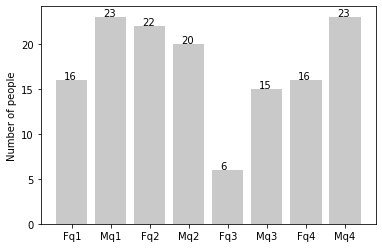

In [55]:
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }
graphgen = [len(dtt["Female1"]), len(dtt["Male1"]), len(dtt["Female2"]), len(dtt["Male2"]), len(dtt["Female3"]), len(dtt["Male3"]), len(dtt["Female4"]), len(dtt["Male4"])]
colorr = (0.7,0.7,0.7,0.7)

x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))